# Analyzing the Stroop Effect



## Table of Contents
- [Importing the dataset](#importing)
- [Dataset Overview](#overview)
- [Questions](#question)
- [References](#ref)

<a id='importing data)'></a>
First step is importing the data we have, that called (stroopdata.csv) in format of csv:

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats
import seaborn as sns

In [6]:
#loading the csv files
stroop_data = pd.read_csv('stroopdata.csv')

Let's get to know our data and what variables we have, read in the dataset and take a look at the top few rows here:

In [7]:
stroop_data.head(6)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878


<a id='overview'></a>
### Dataset Overview 

The dataset contain a time that recorded from each participants, the idea behined this is each participants presented with a list of words, and the word displayed in a color of ink. The participant’s should say in loud the color of the ink in which the word is printed. The task has two conditions: a **congruent** words condition, and an **incongruent** words condition. In the congruent words condition, the words being displayed are match with the color (for example: Blue wrotten in blue ink). In the incongruent words condition, the words displayed are don't match with color (for example: Red wrotten in Balck ink). In each case, we measure the time it takes to name the ink colors in lists. At the end of competition the participants will pass to record a time from each condition, and this is our dataset

In [8]:
# Number of rows and columns in our dataset
stroop_data.drop_duplicates(keep ='first', inplace=True)
rows, col = stroop_data.shape
print('There are now {} rows and {} columns in it.'.format(rows, col))

There are now 24 rows and 2 columns in it.


> As showen, we have 24 rows and 2 columns in our dataset. 

<a id='question'></a>
### Questions

(1) What is the independent variable? What is the dependent variable?

- **Independent variable :** congruent and incogruent (the congruency of the colour and text).
- **Dependent variable :** The response time (duration (time) to recognise the colours or the texts).

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

We will evaluate the effect on the performance of the participants to see either the difference in our results is because the congruent and incongruent test are significantly different.

- μC : The mean of **Congruent** population's response time.
- μI : The mean of **Incongruent** population's response time. 


#### Hypotheses:

- **H0:** The null hypothesis, that the congruent and incongruent populations are not significantly different(H0: μI = μC).
- **HA :** The alternative hypothesis, that the congruent and incongruent populations are significantly different(HA: μI != μC).


#### In our dataset:
- The sample size is 24 (As showen above).
- We measure the same participant but in two time point.


#### Assumption:

Incongruent means that there is an effect on participant ability to read the word even if the color is not match with word, while the Congruent means the participant can read the word fastly because it's match with the color.
So, we can define this is terms of the null hypothesis: H0: μC ≥ μI HA: μC < μI

In words: Will te incongruent situation affect the mean time of person reading the text or not. If we accept the null hypothesis, we can say that not matching the words with color will have no effect on the time taken to read the whole set of words. Rejecting this hypothesis means that the mean time taken to read the congruent situation is lower than the mean time taken to read the incongruent situation.

Given our data, we have two tests, performed on the same subject, hence is a dependant situation. We want to check if μC < μI so we just need a one tailed test. Additionally we only have a sample of an unknown population. The best statistic test to tackle this situation will be the dependent samples t-test.

We will seek to prove that is statiscally significant the difference between the Incongruent mean time and the Congruent mean time, so we can prove that people will always take less time to read the congruent conditon.


##### So, we will conduct a Dependent t-test for Paired Samples*.

- **A dependent t-test** is an example of a "within-subjects" or "repeated-measures" statistical test. This indicates that the same participants are tested more than once. Thus, in the dependent t-test, "related groups" indicates that the same participants are present in both groups. The reason that it is possible to have the same participants in each group is because each participant has been measured on two occasions on the same dependent variable.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

> **We will find for each congruent an incongruent:**
- 1- Mean.
- 2- Standard deviation.

In [9]:
# description of the dataset to find the mean and standard deviation
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- The congruent sample has a mean of  **x̄C = 14.051** seconds and the incongruent sample has a mean of  **x̄I = 22.016**
- The congruent sample has a standard deviation of **σC = 3.559** seconds and the incongruent sample has a standard deviation of **σI = 4.797** seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5, 1.0, 'Congruent VS. Incongruent time respond')

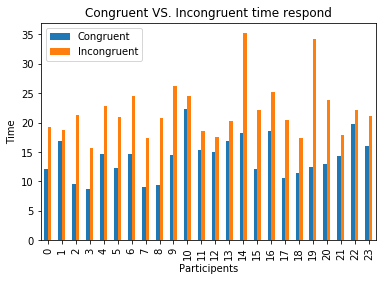

In [10]:
# Build the visualizations here
stroop_data.plot(kind='bar')
plt.xlabel('Participents')              
plt.ylabel('Time')
plt.title('Congruent VS. Incongruent time respond')

> As showen in figure avbove, the incongruent take long time than the congruent for all participants.

Text(0.5, 1.0, 'Median of Congruent and Incongruent')

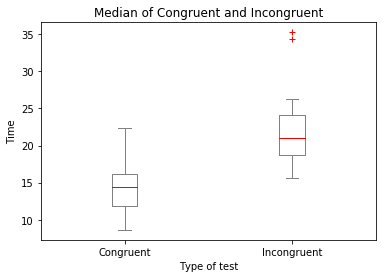

In [11]:
color = dict(boxes='Gray', whiskers='Gray', medians='Red', caps='Gray')
stroop_data.plot.box(color = color, sym = 'r+')
plt.xlabel('Type of test')
plt.ylabel('Time')
plt.title('Median of Congruent and Incongruent')

> Here we can see that the median of incongruent is higher than the median of congruent.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [12]:
# find degree of freedome (df = n-1)
df = 23
print("Degrees of Freedom : df =", df)

Degrees of Freedom : df = 23


In [13]:
# Calculte the mean of each test
mean_congurent = stroop_data['Congruent'].mean()
mean_incongurant = stroop_data['Incongruent'].mean()

# Calculte a point estimate using mean_congurent - mean_incongurant (Average of differences)
estimate_point = mean_congurent - mean_incongurant

# Calculate Square of Sums of difference of sample means
ssd = sum( ( (stroop_data['Congruent'] - stroop_data['Incongruent']) - estimate_point ) ** 2  )

# Calculate the variance of difference
vd = ssd / (24 -1)

# Calculate Standard Deviation of Differences
sdd = vd ** (1/2)

#  calculate the t-statistic for the difference
tstatistic = estimate_point / ( sdd / ( 24 ** (1/2) ) )

# Calculte the p-value
pvalue = stats.t.cdf(x = tstatistic, df = 23 ) * 2 

# Clacute t-critical for alpha level 0.005 (aiming to 99% confidence level)
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)

In [14]:
print("Alpha- level : a =", alpha)
print("t-critical values :  tc  =", -tcritical, tcritical)
print("t-Statistic(df) : t(23) =", tstatistic)
print("p-value : p =", pvalue)

Alpha- level : a = 0.005
t-critical values :  tc  = 2.8073356837675236 -2.8073356837675236
t-Statistic(df) : t(23) = -8.020706944109955
p-value : p = 4.103000585711186e-08


> The t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. that's mean we reject the null hypothesis that there is no statistically significant difference between the two populations.


> The results match up with our observations and expectations that there is indeed a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.

<a id='ref'></a>
### References

- https://study.com/academy/lesson/degrees-of-freedom-definition-formula-example.html
- https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php